<h1>CNN cat vs dogs</h1>

Siec stworzona w oparciu o kiążke Deep Learning with Python, François Chollet
W notatniku są dwa modele jeden bez augmentacji drugi z augmentacja

In [1]:
import os, shutil

orignal_dataset_directory = './data/train'

small_dataset_directory = './small_data'
os.mkdir(small_dataset_directory)

# Directory for training data
train_dir = os.path.join(small_dataset_directory,'train')
os.mkdir(train_dir)

# Directory for validation data
validation_dir = os.path.join(small_dataset_directory,'validation')
os.mkdir(validation_dir)

#Directory for test data
test_dir = os.path.join(small_dataset_directory,'test')
os.mkdir(test_dir)

# Training directoy with cats
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

# Training directoy with dogs
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

# Valid directoy with cats
valid_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(valid_cats_dir)

# Valid directoy with dogs
valid_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(valid_dogs_dir)

# Test directoy with cats
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

# Test directoy with dogs
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [2]:
# To train cats data
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(orignal_dataset_directory,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src, dst)
    
# To valid cats data
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orignal_dataset_directory,fname)
    dst = os.path.join(valid_cats_dir,fname)
    shutil.copyfile(src, dst)
    
# To test cats data   
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(orignal_dataset_directory,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src, dst)
    

# To train dogs data
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(orignal_dataset_directory,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src, dst)
    
# To valid dogs data
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(orignal_dataset_directory,fname)
    dst = os.path.join(valid_dogs_dir,fname)
    shutil.copyfile(src, dst)
    
# To test dogs data   
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(orignal_dataset_directory,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total valid cats images:', len(os.listdir(valid_cats_dir)))
print('total test cats images:', len(os.listdir(test_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total valid dogs images:', len(os.listdir(valid_dogs_dir)))
print('total test dogs images:', len(os.listdir(test_dogs_dir)))

total training cats images: 1000
total valid cats images: 500
total test cats images: 500
total training dogs images: 1000
total valid dogs images: 500
total test dogs images: 500


In [4]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.models.Sequential()

model.add(layers.Conv2D( 32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = 'accuracy' )

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 )
test_datagen = ImageDataGenerator(rescale = 1./255 )
valid_datagen = ImageDataGenerator(rescale = 1./255 )
train_datagen = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

valid_datagen = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

test_datagen = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_datagen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [9]:
history = model.fit_generator(train_datagen,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = valid_datagen,
                             validation_steps = 50)

/home/tomasz/anaconda3/envs/mymlenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 28s 269ms/step - loss: 0.6993 - accuracy: 0.5150 - val_loss: 0.6759 - val_accuracy: 0.5450
Epoch 2/30
100/100 [==============================] - 27s 269ms/step - loss: 0.6623 - accuracy: 0.6138 - val_loss: 0.6694 - val_accuracy: 0.5870
Epoch 3/30
100/100 [==============================] - 29s 289ms/step - loss: 0.6239 - accuracy: 0.6557 - val_loss: 0.6229 - val_accuracy: 0.6410
Epoch 4/30
100/100 [==============================] - 28s 282ms/step - loss: 0.5732 - accuracy: 0.6999 - val_loss: 0.6056 - val_accuracy: 0.6690
Epoch 5/30
100/100 [==============================] - 28s 284ms/step - loss: 0.5474 - accuracy: 0.7148 - val_loss: 0.6516 - val_accuracy: 0.6220
Epoch 6/30
100/100 [==============================] - 26s 263ms/step - loss: 0.5084 - accuracy: 0.7539 - val_loss: 0.5723 - val_accuracy: 0.6990
Epoch 7/30
100/100 [==============================] - 25s 249ms/step - loss: 0.4885 - accuracy: 0.7649 - val_loss: 0.5874 - val_ac

In [35]:
model.save('cats_and_dogs_samll_1.h5')

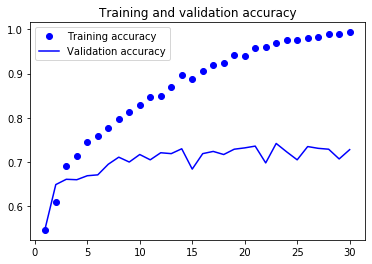

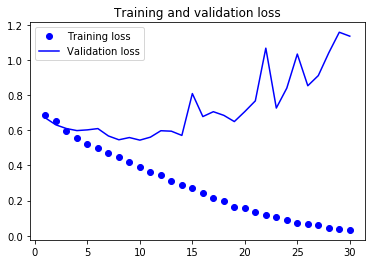

In [39]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs, acc, 'bo' , label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b' , label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo' , label = 'Training loss')
plt.plot(epochs, val_loss, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom+range = .2,
    horizontal_flip = True,
    fill_mode = 'nearest')

In [ ]:
form tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
image_path = fnames[3]
img = image.load_img(image_path, target_size = (150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 ==0:
        break

plt.show()
